In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
dataTrain = pd.read_csv("data/datosNumericosTrain.csv")
dataTest = pd.read_csv("data/datosNumericosTest.csv")

In [3]:
dataTrain = dataTrain.drop('Unnamed: 0',1)
dataTest = dataTest.drop('Unnamed: 0',1)

In [4]:
dataTrain['Enero - cantidadEventos'].value_counts()

0     18827
1       282
2       105
3        69
4        34
5        31
6        20
7        12
8        10
11        4
19        3
16        3
14        2
9         2
10        2
13        2
15        2
24        1
21        1
18        1
12        1
Name: Enero - cantidadEventos, dtype: int64

In [5]:
dataTest.head()

,person,Enero_cantEventos,Febrero_cantEventos,Marzo_cantEventos,Abril_cantEventos,Mayo_cantEventos,Enero_checkouts,Febrero_checkouts,Marzo_checkouts,Abril_checkouts,...,Enero_accesos a la homepage,Febrero_accesos a la homepage,Marzo_accesos a la homepage,Abril_accesos a la homepage,Mayo_accesos a la homepage,Enero_listadosVisitados,Febrero_listadosVisitados,Marzo_listadosVisitados,Abril_listadosVisitados,Mayo_listadosVisitados
0,00091926,0,0,0,0,22,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00091a7a,0,0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000ba417,0,0,0,0,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0
3,000e4d9e,0,0,0,0,9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
4,000e619d,0,0,0,0,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0


## Probando los labels numericos

In [6]:
#Para el de train
df1 = dataTrain.loc[:, dataTrain.columns.str.contains("Enero")] 
df2 = dataTrain.loc[:, dataTrain.columns.str.contains("Febrero")]
df3 = dataTrain.loc[:, dataTrain.columns.str.contains("Marzo")]
df4 = dataTrain.loc[:, dataTrain.columns.str.contains("Abril")]
df5 = dataTrain.loc[:, dataTrain.columns.str.contains("Mayo")]
labels = dataTrain.loc[:, dataTrain.columns.str.contains("label")]
persons = dataTrain.loc[:, dataTrain.columns.str.contains("person")]
trainSet = pd.concat([persons, df1, df2, df3, df4, df5, labels], axis=1, sort=False)
trainSet.head()

,person,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,...,Mayo - leads,Mayo - conversiones,Mayo - staticPageVisitadas,Mayo - ProductosVistosPorUser,Mayo - productosBuscados,Mayo - accesos por marketing online,Mayo - searchEngine,Mayo - accesos a la homepage,Mayo - listadosVisitados,label
0,0008ed71,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,000c79fe,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,001802e4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0019e639,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,8.0,0
4,001b0bf9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
#Para el de test
df1 = dataTest.loc[:, dataTest.columns.str.contains("Enero")] 
df2 = dataTest.loc[:, dataTest.columns.str.contains("Febrero")]
df3 = dataTest.loc[:, dataTest.columns.str.contains("Marzo")]
df4 = dataTest.loc[:, dataTest.columns.str.contains("Abril")]
df5 = dataTest.loc[:, dataTest.columns.str.contains("Mayo")]
persons = dataTest.loc[:, dataTest.columns.str.contains("person")]
testSet = pd.concat([persons, df1, df2, df3, df4, df5], axis=1, sort=False)
testSet.head()

,person,Enero_cantEventos,Enero_checkouts,Enero_leads,Enero_conversiones,Enero_staticPageVisitadas,Enero_ProductosVistosPorUser,Enero_productosBuscados,Enero_accesos por marketing online,Enero_searchEngine,...,Mayo_checkouts,Mayo_leads,Mayo_conversiones,Mayo_staticPageVisitadas,Mayo_ProductosVistosPorUser,Mayo_productosBuscados,Mayo_accesos por marketing online,Mayo_searchEngine,Mayo_accesos a la homepage,Mayo_listadosVisitados
0,00091926,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00091a7a,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000ba417,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0
3,000e4d9e,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0
4,000e619d,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0


In [8]:
testSet.to_csv('data/testSet.csv', index=False)

In [9]:
X = trainSet.iloc[:,1:]
X = X.iloc[:,:-1].values
y = trainSet['label'].values


In [10]:
T = testSet.iloc[:,1:].values

#### Visualizacion de datos sin muestrear


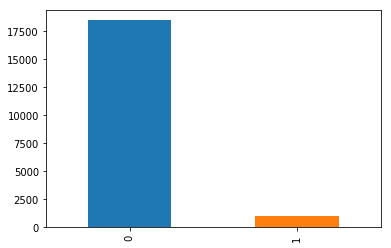

In [11]:
trainSet['label'].value_counts().plot(kind= 'bar')

#### SubMuestreo o undersample

In [12]:
#COMO HABIAMOS HECHO ANTERIORMENTE FH, DEJE LA MISMA NOMENCLATURA, POR LO QUE OBTENGO EL DF NUEVAMENTE
nuevoX1=trainSet.iloc[:,:]
print nuevoX1.shape
nuevoX1.head()

(19414, 57)


,person,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,...,Mayo - leads,Mayo - conversiones,Mayo - staticPageVisitadas,Mayo - ProductosVistosPorUser,Mayo - productosBuscados,Mayo - accesos por marketing online,Mayo - searchEngine,Mayo - accesos a la homepage,Mayo - listadosVisitados,label
0,0008ed71,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,000c79fe,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,001802e4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0019e639,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,8.0,0
4,001b0bf9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
#1.Encuentra el número de muestras que son conversiones
sizeConversiones = len(nuevoX1[nuevoX1['label'] == 1])
sizeConversiones

980

In [14]:
#2. Obtener índices de muestras de no conversiones.
no_conversiones_indices = nuevoX1[nuevoX1.label == 0].index 

In [15]:
#Muestras aleatorias de índices de no conversiones.
#GENERO SEMILLA CON 3 PORQUE SI, EN REALIDAD PORQUE BRINDA UN NUMERO BAJO COMO 46
np.random.seed(3)
random_indices_no_conversiones = np.random.choice(no_conversiones_indices,sizeConversiones, replace=False)
random_indices_no_conversiones=random_indices_no_conversiones
random_indices_no_conversiones[:10]

array([   46,  8778, 14191,  9770, 10971, 18617, 16645, 16070, 14830,
        5436], dtype=int64)

In [16]:
#4. Encuentra los índices de muestras de conversiones.
conversiones = nuevoX1[nuevoX1.label == 1].index

In [17]:
#5. Índices de conversiones concat con muestras de no conversiones.
under_sample_indices = np.concatenate([conversiones,random_indices_no_conversiones])

In [18]:
#6 Obtener Balance Dataframe
under_sample = nuevoX1.loc[under_sample_indices]

In [19]:
under_sample = under_sample.sort_values(by='person')

#### Visualización de datos submuestreados

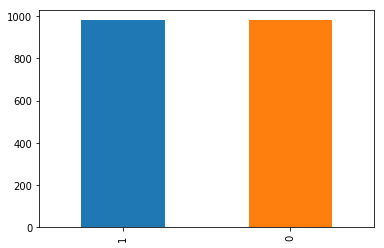

In [20]:
under_sample['label'].value_counts().plot(kind='bar')

### Ejecución de regresión logística en datos submuestreados

In [21]:
#VERIFICO EL INDICE 46=00c40a4b
print under_sample.shape
under_sample.to_csv('features/under_sample.csv', index=False)
under_sample.head()

(1960, 57)


,person,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,...,Mayo - leads,Mayo - conversiones,Mayo - staticPageVisitadas,Mayo - ProductosVistosPorUser,Mayo - productosBuscados,Mayo - accesos por marketing online,Mayo - searchEngine,Mayo - accesos a la homepage,Mayo - listadosVisitados,label
13,003476c0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
16,003bdb4d,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
17,003d4cac,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18,003dd965,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1
19,0042421c,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
